In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('train.csv')
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
df.shape

(159571, 8)

# EDA

Let's explore the comment_text column and label columns.

In [5]:
for message_no, message in enumerate(df['comment_text'][:5]):
    print(message_no, message)
    print('\n')

0 Explanation
Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27


1 D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)


2 Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.


3 "
More
I can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of ""types of accidents""  -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on refer

In [6]:
df.groupby(['toxic']).describe().transpose()

toxic                            0             1
severe_toxic  count  144277.000000  15294.000000
              mean        0.000000      0.104289
              std         0.000000      0.305645
              min         0.000000      0.000000
              25%         0.000000      0.000000
              50%         0.000000      0.000000
              75%         0.000000      0.000000
              max         0.000000      1.000000
obscene       count  144277.000000  15294.000000
              mean        0.003625      0.518242
              std         0.060099      0.499683
              min         0.000000      0.000000
              25%         0.000000      0.000000
              50%         0.000000      1.000000
              75%         0.000000      1.000000
              max         1.000000      1.000000
threat        count  144277.000000  15294.000000
              mean        0.000201      0.029358
              std         0.014176      0.168813
              min         0.000000      0.000000
              25%         0.000000      0.000000
              50%         0.000000      0.000000
              75%         0.000000      0.000000
              max         1.000000      1.000000
insult        count  144277.000000  15294.000000
              mean        0.003694      0.480188
              std         0.060668      0.499624
              min         0.000000      0.000000
              25%         0.000000      0.000000
              50%         0.000000      0.000000
              75%         0.000000      1.000000
              max         1.000000      1.000000
identity_hate count  144277.000000  15294.000000
              mean        0.000714      0.085131
              std         0.026710      0.279086
              min         0.000000      0.000000
              25%         0.000000      0.000000
              50%         0.000000      0.000000
              75%         0.000000      0.000000
              max         1.000000      1.000000

We will now analyse the length of the text comments in the dataframe.

In [7]:
df['Length']=df['comment_text'].apply(len)
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,Length
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67


In [8]:
df.Length.describe()

count    159571.000000
mean        394.073221
std         590.720282
min           6.000000
25%          96.000000
50%         205.000000
75%         435.000000
max        5000.000000
Name: Length, dtype: float64

We see that the average length of the comment is 394 letters while the longest comments have 5000 characters. let's look at one of those comments.

In [9]:
df[df['Length']==5000]['comment_text'].iloc[0]

'ii CAN STILL POST WITH THIS COMPUTER...I SAID BLOCK ME, COME THE FUCK DOWN HERE AND ARREST ME...SAN DIEGO CALIFORNIA, CHULA VISTA, FUCKING GET YOUR INFORMATION RIGHT FAGGOT SHITHEAD!!i CAN STILL POST WITH THIS COMPUTER...I SAID BLOCK ME, COME THE FUCK DOWN HERE AND ARREST ME...SAN DIEGO CALIFORNIA, CHULA VISTA, FUCKING GET YOUR INFORMATION RIGHT FAGGOT SHITHEAD!!i CAN STILL POST WITH THIS COMPUTER...I SAID BLOCK ME, COME THE FUCK DOWN HERE AND ARREST ME...SAN DIEGO CALIFORNIA, CHULA VISTA, FUCKING GET YOUR INFORMATION RIGHT FAGGOT SHITHEAD!!i CAN STILL POST WITH THIS COMPUTER...I SAID BLOCK ME, COME THE FUCK DOWN HERE AND ARREST ME...SAN DIEGO CALIFORNIA, CHULA VISTA, FUCKING GET YOUR INFORMATION RIGHT FAGGOT SHITHEAD!!i CAN STILL POST WITH THIS COMPUTER...I SAID BLOCK ME, COME THE FUCK DOWN HERE AND ARREST ME...SAN DIEGO CALIFORNIA, CHULA VISTA, FUCKING GET YOUR INFORMATION RIGHT FAGGOT SHITHEAD!!i CAN STILL POST WITH THIS COMPUTER...I SAID BLOCK ME, COME THE FUCK DOWN HERE AND ARRES

Look's like we have a really frustrated guy looping his cusses at someone. The point is if we feed this data directly into our model, these words that are repeated frequently should be given less weightage otherwise they will alter the results of our model.
So we'll have to find a way to take into account account how frequently a word gets repeated.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
 8   Length         159571 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 11.0+ MB


In [12]:
df.nunique()

id               159571
comment_text     159571
toxic                 2
severe_toxic          2
obscene               2
threat                2
insult                2
identity_hate         2
Length             4046
dtype: int64

In [13]:
df.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
Length           0
dtype: int64

Our data consists of 159571 values and it's good that we don't have to deal with any null values. The id columns has all unique values and has little relevance to our model. So we will drop it.

In [19]:
df=df.drop('id',axis=1)

In [5]:
label_cols=['toxic','severe_toxic','obscene','threat','insult','identity_hate']

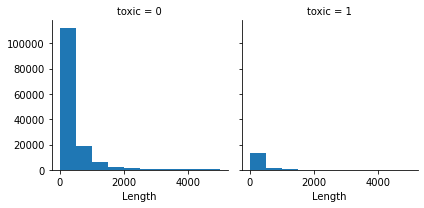

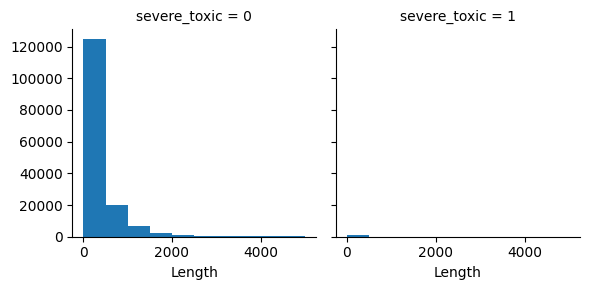

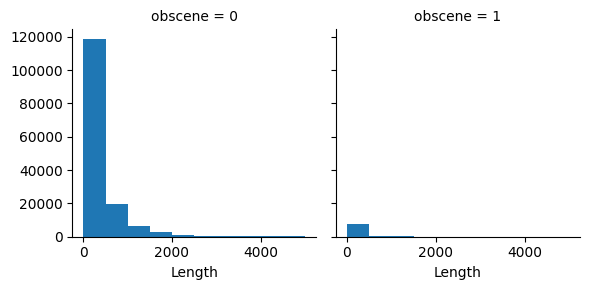

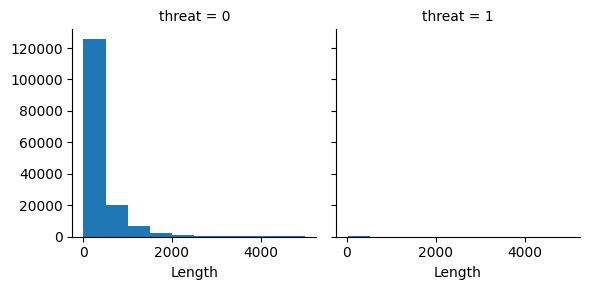

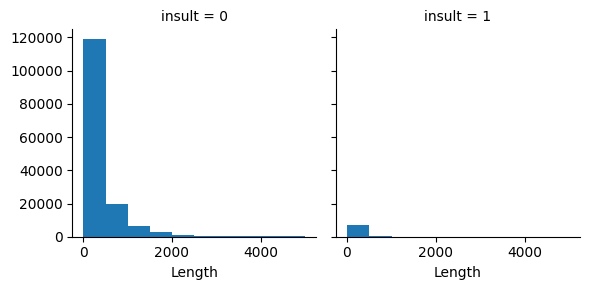

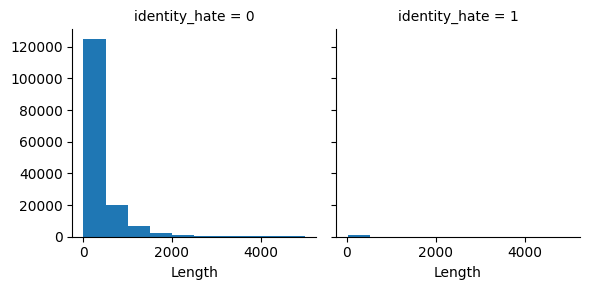

In [16]:
for label in label_cols:
    g = sns.FacetGrid(df,col=label)
    g = g.map(plt.hist,'Length')

Intersting. We see that the comments which fall under a positive value of label tend to have less number of characters usuallly.

Let's see the number of comments under each label.

In [17]:
#df.iloc[:,1:7]

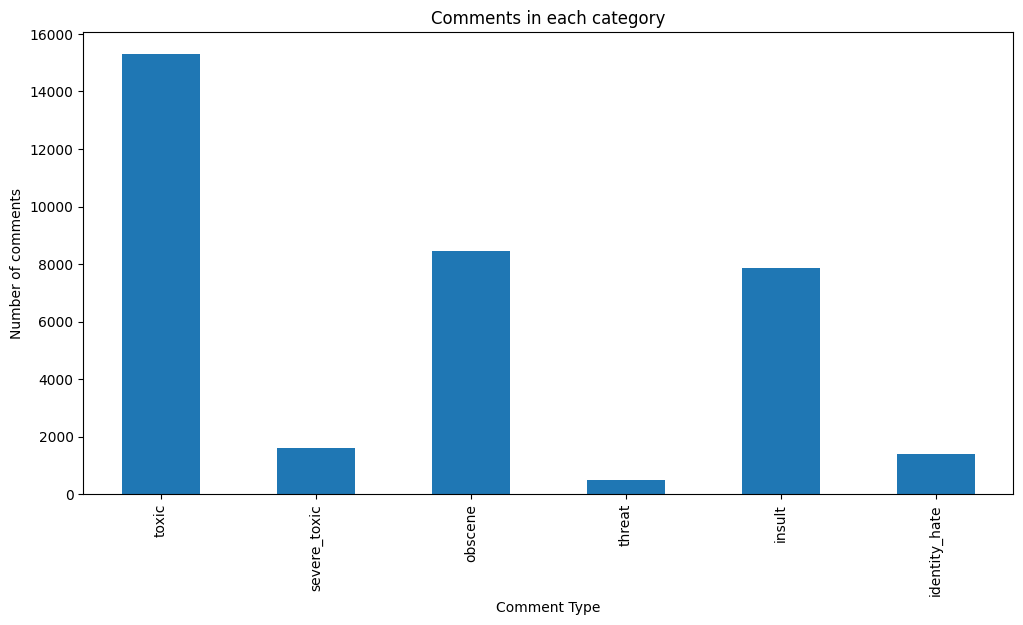

In [19]:
plt.figure(figsize=(12,6))
plt.title('Comments in each category')
plt.xlabel('Comment Type')
plt.ylabel('Number of comments')
df.iloc[:,1:7].sum().plot(kind='bar')
plt.show()

Now let's look at the comments having multiple labels

In [20]:
#df.iloc[:,1:7].sum(axis=1).value_counts().iloc[1:]

C:\Users\pusha\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Comments having multiple labels'}, xlabel='Number of labels', ylabel='Number of comments'>

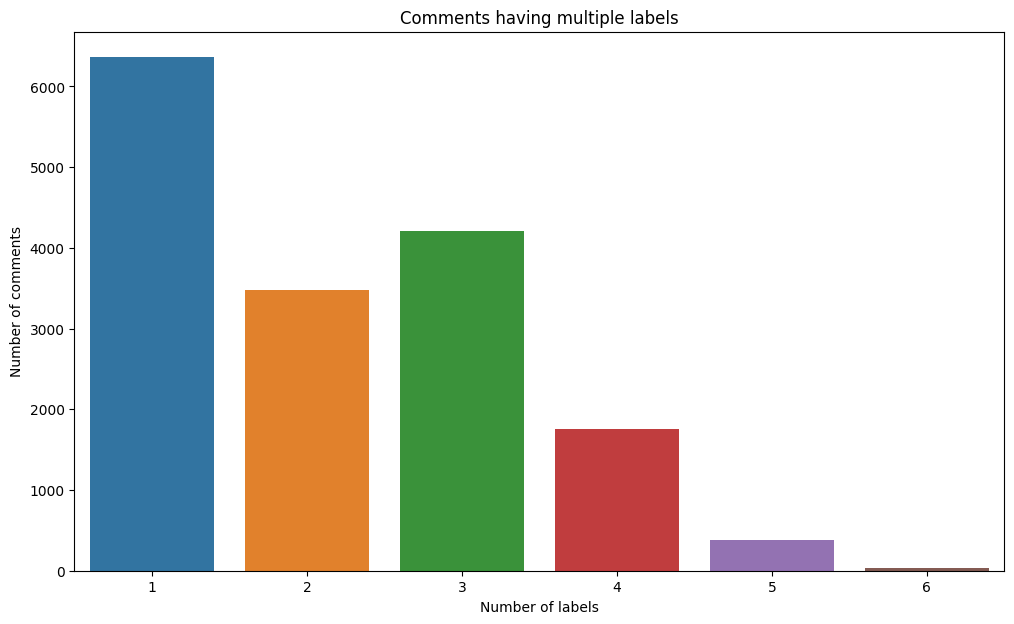

In [21]:
data=df.iloc[:,1:7].sum(axis=1).value_counts().iloc[1:]
plt.figure(figsize=(12,7))
plt.xlabel("Number of labels")
plt.ylabel('Number of comments')
plt.title("Comments having multiple labels")
sns.barplot(data.index,data)

Let's see the most used words in each category.

In [6]:
from wordcloud import WordCloud,STOPWORDS

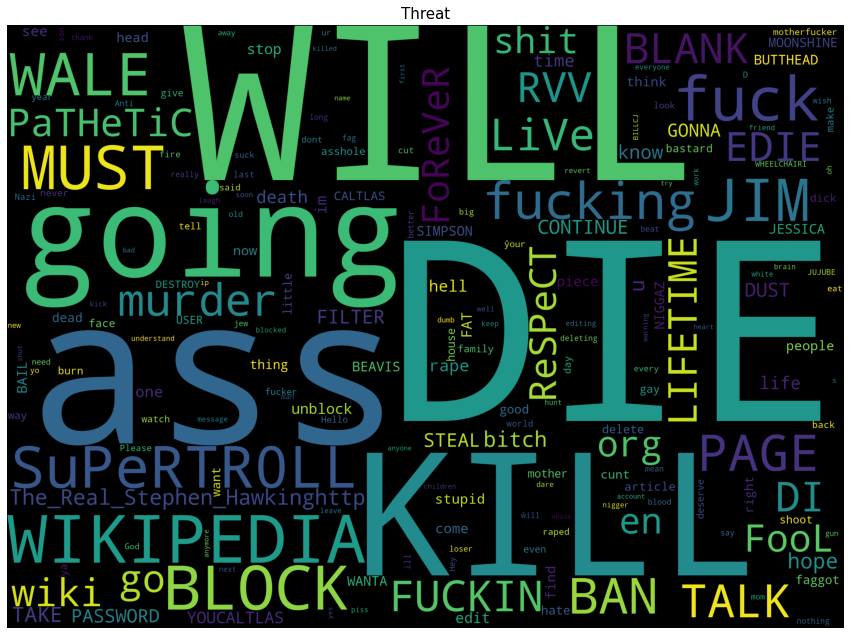

In [7]:
plt.figure(figsize=(15,12))
# threat
text = df[df.threat==True].comment_text.values
cloud_threat = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))
plt.axis('off')
plt.title("Threat",fontsize=15)
plt.imshow(cloud_threat)

# Preprocessing
We first convert the comments to lower-case and then use custom made functions to remove html-tags, punctuation and non-alphabetic characters from the comments, using regular expressions.

In [9]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")
def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext
def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned
def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent
df['comment_text'] = df['comment_text'].str.lower()
df['comment_text'] = df['comment_text'].apply(cleanHtml)
df['comment_text'] = df['comment_text'].apply(cleanPunc)
df['comment_text'] = df['comment_text'].apply(keepAlpha)

Now we'll remove all the stop-words present in the comments using the default set of stop-words that can be downloaded from NLTK library. We also add few stop-words to the standard list.Stop words are any word in a stop list which are filtered out (i.e. stopped) before or after processing of natural language data .

In [10]:
stop_words = set(stopwords.words('english'))
stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)
df['comment_text'] = df['comment_text'].apply(removeStopWords)

Now we'll do stemming. There exist different kinds of stemming which basically transform words with roughly the same semantics to one standard form. For example stemming will generalise words like surprising, surprised to surpris.

In [11]:
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence
df['comment_text'] = df['comment_text'].apply(stemming)

# Split the data into train and test sets
We will split the data into train and test sets and then we'll apply tfidf vectorizer to convert these words to numerical values which can be fed into the model. The product of tf & idf (TF-IDF) of a word gives a product of how frequent a word is in the document multiplied by how unique the word is w.r.t. the entire corpus of documents.

In [20]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, random_state=42, test_size=0.30, shuffle=True)

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
vectorizer.fit(train['comment_text'])
x_train = vectorizer.transform(train['comment_text'])
y_train = train.drop('comment_text', axis=1)
x_test = vectorizer.transform(test['comment_text'])
y_test = test.drop('comment_text', axis=1)

In [37]:
x_train.shape

(111699, 4792695)

In [23]:
x_test.shape

(47872, 4792695)

In [24]:
y_train.shape

(111699, 6)

In [25]:
y_test.shape

(47872, 6)

In [26]:
y_train.value_counts(normalize=True)

toxic  severe_toxic  obscene  threat  insult  identity_hate
0      0             0        0       0       0                0.898316
1      0             0        0       0       0                0.035909
                     1        0       1       0                0.023760
                                      0       0                0.011012
                     0        0       1       0                0.007475
       1             1        0       1       0                0.006186
       0             1        0       1       1                0.003894
0      0             1        0       0       0                0.001970
                     0        0       1       0                0.001808
1      1             1        0       1       1                0.001585
0      0             1        0       1       0                0.001182
1      1             1        0       0       0                0.000967
       0             0        0       1       1                0.000895
    

In [27]:
y_test.value_counts(normalize=True)

toxic  severe_toxic  obscene  threat  insult  identity_hate
0      0             0        0       0       0                0.898333
1      0             0        0       0       0                0.034571
                     1        0       1       0                0.023939
                                      0       0                0.011029
                     0        0       1       0                0.007938
       1             1        0       1       0                0.006225
       0             1        0       1       1                0.003823
0      0             0        0       1       0                0.002068
                     1        0       0       0                0.002026
1      1             1        0       1       1                0.001838
                                      0       0                0.001044
0      0             1        0       1       0                0.001024
1      0             0        0       0       1                0.001003
    

# Model Building
## Logistic Regression
Let's build a logistic regression model and see how it performs. We will use OneVsRestClassifier to acheive the multi label classification.

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,hamming_loss
from sklearn.multiclass import OneVsRestClassifier

In [33]:
# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),
            ])
for category in label_cols:
    print('**Processing {} comments...**'.format(category))
    
    # Training logistic regression model on train data
    LogReg_pipeline.fit(x_train, train[category])
    
    # calculating test accuracy and hamming loss
    prediction = LogReg_pipeline.predict(x_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    print('Hamming loss is {}'.format(hamming_loss(test[category], prediction)))
    print("\n")

**Processing toxic comments...**
Test accuracy is 0.9536890040106952
Hamming loss is 0.04631099598930481


**Processing severe_toxic comments...**
Test accuracy is 0.9899314839572193
Hamming loss is 0.010068516042780749


**Processing obscene comments...**
Test accuracy is 0.9763327205882353
Hamming loss is 0.023667279411764705


**Processing threat comments...**
Test accuracy is 0.9970964237967914
Hamming loss is 0.002903576203208556


**Processing insult comments...**
Test accuracy is 0.9695855614973262
Hamming loss is 0.030414438502673797


**Processing identity_hate comments...**
Test accuracy is 0.991644385026738
Hamming loss is 0.008355614973262033




## Final Comments
We see that Logistic Regression alone is giving us pretty good results, however i also tried to implement a neural network model but because of the high number of features it was taking an exponential amount of time to train, so i'm settling for this model. if we have the computing power then we can also try an ANN model and see what results we get.